# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name:  Juanwen Zhang

Student ID: 1002247017

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

import pandas as pd

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? ___
* How many observations have a 'mean area' of greater than 700? ___
* How many participants tested `Malignant`? ___
* How many participants tested `Benign`? ___

In [ ]:
dataset

In [9]:
num_feature = len(dataset["feature_names"])
print("There are"+ " " + str(num_feature) + " " + "features in the dataset")

There are 30 features in the dataset


In [10]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
df['target'] = dataset['target']

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
df_1 = df[df['mean area']>700]
print(str(len(df_1)) + " " + "observations have the mean area greater than 700")


171 observations have the mean area greater than 700


In [24]:
df_mal = df[df['target'] == 0]
df_ben = df[df['target'] == 1]
print(str(len(df_mal)) + " " + "participants tested Malignant")
print(str(len(df_ben)) + " " + "participants tested Benign")

212 participants tested Malignant
357 participants tested Benign


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




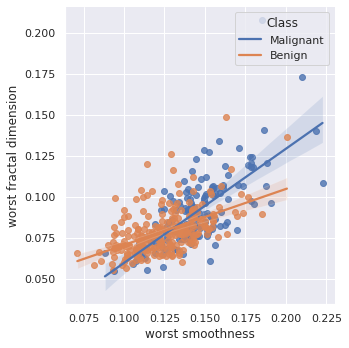

In [32]:
df_train = pd.DataFrame(X_train, columns=dataset['feature_names'])
df_train['target']= y_train  

import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
plot = sns.lmplot(x = "worst smoothness", y = "worst fractal dimension", data = df_train, hue = "target", legend=False)
plt.legend(title='Class', loc='upper right', labels=['Malignant', 'Benign'])
plt.show(plot)


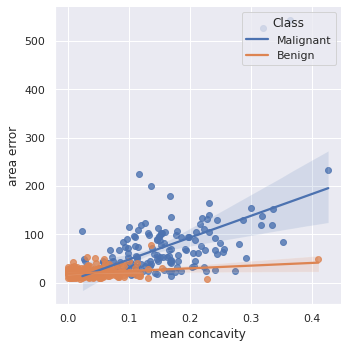

In [33]:
plot = sns.lmplot(x = "mean concavity", y = "area error", data = df_train, hue = "target", legend=False)
plt.legend(title='Class', loc='upper right', labels=['Malignant', 'Benign'])
plt.show(plot)

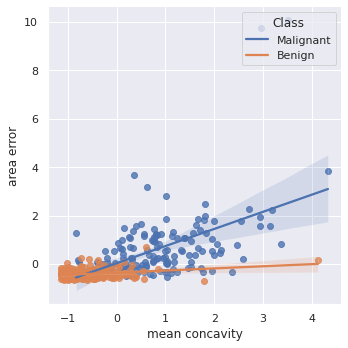

In [39]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
df_train_standard = pd.DataFrame(X_train_standard, columns=dataset['feature_names'])
df_train_standard['target']= y_train  

plot = sns.lmplot(x = "mean concavity", y = "area error", data = df_train_standard, hue = "target", legend=False)
plt.legend(title='Class', loc='upper right', labels=['Malignant', 'Benign'])
plt.show(plot)     

Visually the allocation of points has no change, but the X-axis and Y-axis has changed to a more standard scale with similar ranges. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. So standardization can avoid this issue by equalizing the data range variability.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




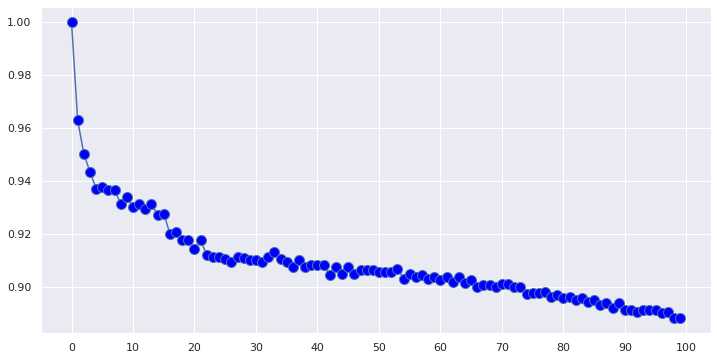

In [37]:
# show plot of mean cross-validation accuracy for train_score vs k
from sklearn import neighbors
from sklearn.model_selection import cross_validate
import numpy as np
train_scores_mean = []
for i in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=True)
    train_scores_mean.append(scores['train_score'].mean())

plt.figure(figsize=(12, 6))  
plt.plot(train_scores_mean, marker='o', markerfacecolor='blue', markersize=10)
x_ticks = np.arange(0, 101, 10)
plt.xticks(x_ticks)
plt.grid(True)

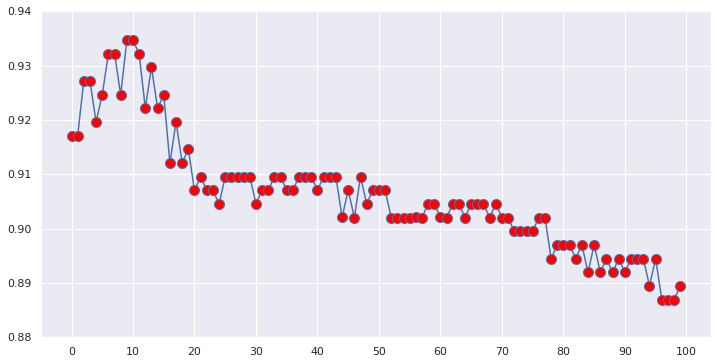

In [42]:
# show plot of mean cross-validation accuracy for test_score vs k
scores_mean = []
for i in range(1, 101):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores = cross_validate(knn, X_train, y_train, cv=5,return_train_score=False)
    scores_mean.append(scores['test_score'].mean())

plt.figure(figsize=(12, 6))  
plt.plot(scores_mean, marker='o', markerfacecolor='red', markersize=10)
x_ticks = np.arange(0, 101, 10)
y_ticks = np.arange(0.88, 0.95, 0.01)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(True)

In [43]:
knn_best = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_best.fit(X_train, y_train)
scores_highest = cross_validate(knn_best, X_train, y_train, cv=5,return_train_score=False)
print( "The best K is 10")
print('The highest Score is:', scores_highest['test_score'].mean())


The best K is 10
The highest Score is: 0.9346518987341772


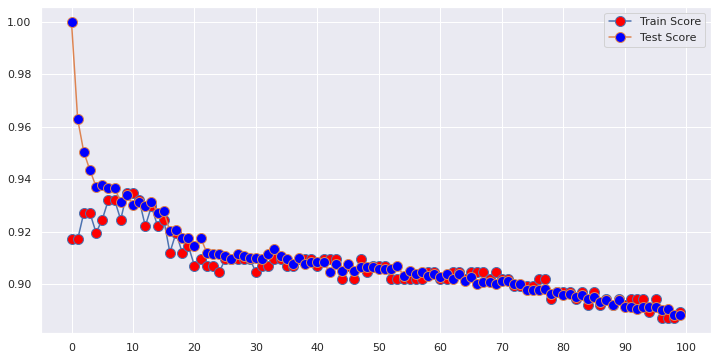

In [44]:
plt.figure(figsize=(12, 6)) 
plt.plot(scores_mean, marker='o', markerfacecolor='red', markersize=10)
plt.plot(train_scores_mean, marker='o', markerfacecolor='blue', markersize=10)
plt.legend(["Train Score", "Test Score"])
x_ticks = np.arange(0, 101, 10)
plt.xticks(x_ticks)
plt.grid(True)

K has the range of 1 to 10: Overfitting. K has the range of 11 to 100: Underfitting.

## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [105]:
def Feature_selector (x , y , tr):
    import warnings
    import numpy as np
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    from matplotlib import pyplot
    from numpy import sort
    # cross validation
    
    feature_list = list(df.iloc[:,:-1].columns)
    removed_feature=[]
    best_k = []
    best_score = []
    while x.shape[1] > 1 and (len(best_score) == 0 or max(best_score) >= tr * max(scores_mean)):
      model = DecisionTreeClassifier(random_state=0)
      model.fit(x, y)
      feature_importances = model.feature_importances_
    
      # remove the least important feature and store it
      pd_feature_importances = pd.DataFrame({'feature': feature_list, 'importance': feature_importances}).sort_values('importance', ascending = False)
      last_feature = pd_feature_importances.iloc[-1:, 0]
      last_feature_index = list(last_feature.index.values)
      x = np.delete(x,last_feature_index, 1) 
      removed_feature.append(last_feature.values[0])   
      feature_list.pop(last_feature.index.values[0])
      #print(x.shape[1])
      # Trian the knn
      meanscore_list = []
      for i in range(1, 100):
        knn_model = KNeighborsClassifier(n_neighbors=i)
        scores = cross_validate(knn_model, x, y, cv=5, return_train_score=False)
        mean_score = scores['test_score'].mean()
        meanscore_list.append(mean_score)
      
      # after the loop, find the k with highest score, and store score and k  
      best_score.append(max(meanscore_list))
      #print(best_score)
      best_score_index = meanscore_list.index(max(meanscore_list))
      best_k.append(best_score_index + 1)
      #print(best_k)
    
    return removed_feature, best_score, best_k
 

In [106]:
print(Feature_selector (X_train , y_train , tr=0.95))

(['worst fractal dimension', 'fractal dimension error', 'mean radius', 'symmetry error', 'mean area', 'worst radius', 'mean texture', 'mean perimeter', 'compactness error', 'mean smoothness', 'mean compactness', 'mean concavity', 'concave points error', 'mean concave points', 'worst smoothness', 'perimeter error', 'concavity error', 'worst compactness', 'texture error', 'mean fractal dimension', 'smoothness error', 'radius error', 'worst texture', 'worst perimeter', 'mean symmetry', 'worst symmetry', 'worst concavity', 'area error', 'worst area'], [0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9346518987341772, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.9145886075949367, 0.914

In [93]:
print(len(removed_feature))

29


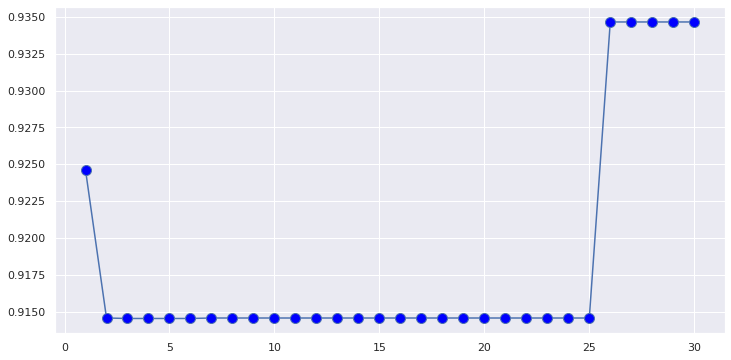

In [107]:
removed_feature, best_score, best_k = Feature_selector (X_train , y_train , tr=0.95)
best_score.reverse()
best_score.append(scores_highest['test_score'].mean())
best_score_nonstand = best_score
plt.figure(figsize=(12, 6)) 
num_of_feature = []
for i in range(1, 31):
  num_of_feature.append(i)
plt.plot(num_of_feature, best_score_nonstand, marker='o', markerfacecolor='blue', markersize=10)

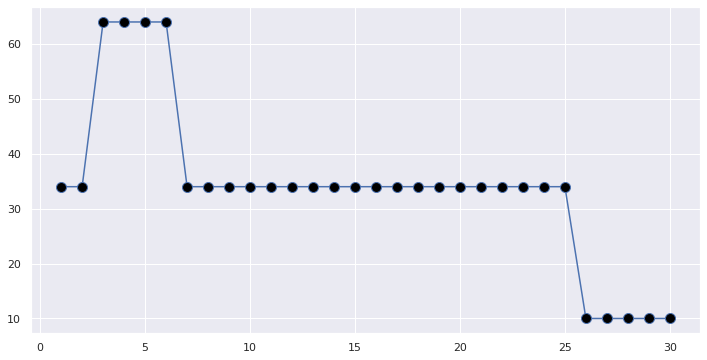

In [108]:
best_k.reverse()
best_k.append(10)
num_of_features = []
for i in range(1, 31):
  num_of_features.append(i)
plt.figure(figsize=(12, 6)) 
plt.plot(num_of_features, best_k, marker='o', markerfacecolor='black', markersize=10)

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


In [64]:
# Calculate for highest score with full features on standardized x_train
from sklearn.neighbors import KNeighborsClassifier
full_f_score = []
for i in range(1, 100):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn_model, X_train_stand, y_train, cv=5, return_train_score=False)
  mean_score = scores['test_score'].mean()
  full_f_score.append(mean_score)
highest_score = max(full_f_score)
highest_score


0.9674367088607594

In [120]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_stand = scalar.fit_transform(X_train)
X_test_stand = scalar.fit_transform(X_test)

removed_feature, best_score_stand, best_k = Feature_selector(X_train_stand, y_train , tr=0.95)
print(len(removed_feature))
print(best_score_stand)
print(best_k)

29
[0.9649050632911391, 0.9674367088607594, 0.9674367088607594, 0.9623734177215189, 0.9649367088607596, 0.9624050632911393, 0.9598417721518986, 0.9598417721518986, 0.9598417721518986, 0.9598101265822784, 0.9598417721518988, 0.9624050632911393, 0.9623734177215189, 0.9648417721518987, 0.9674050632911392, 0.9649050632911391, 0.9548101265822785, 0.9548101265822785, 0.959873417721519, 0.9624050632911392, 0.9674367088607594, 0.9674050632911392, 0.9548417721518987, 0.9548101265822784, 0.9573417721518986, 0.957373417721519, 0.9572784810126581, 0.9496518987341773, 0.9246202531645569]
[10, 10, 10, 9, 10, 9, 5, 5, 5, 3, 5, 10, 3, 4, 8, 8, 10, 6, 12, 12, 12, 12, 34, 18, 28, 27, 5, 6, 34]


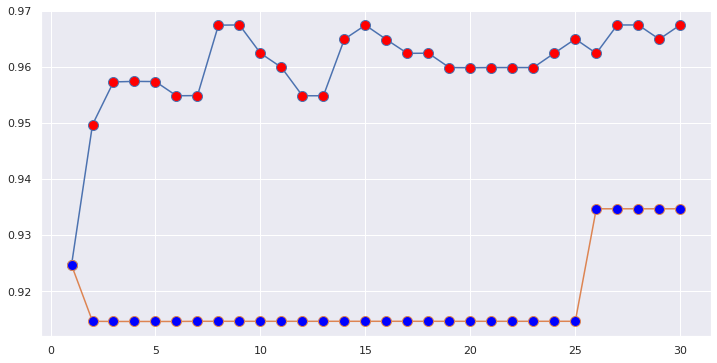

In [110]:
best_score_stand.reverse()
best_score_stand.append(highest_score)

plt.figure(figsize=(12, 6)) 
num_of_feature = []
for i in range(1, 31):
  num_of_feature.append(i)
plt.plot(num_of_feature, best_score_stand, marker='o', markerfacecolor='red', markersize=10)
plt.plot(num_of_features, best_score_nonstand, marker='o', markerfacecolor='blue', markersize=10)


[34, 6, 5, 27, 28, 18, 34, 12, 12, 12, 12, 6, 10, 8, 8, 4, 3, 10, 5, 3, 5, 5, 5, 9, 10, 9, 10, 10, 10, 10]


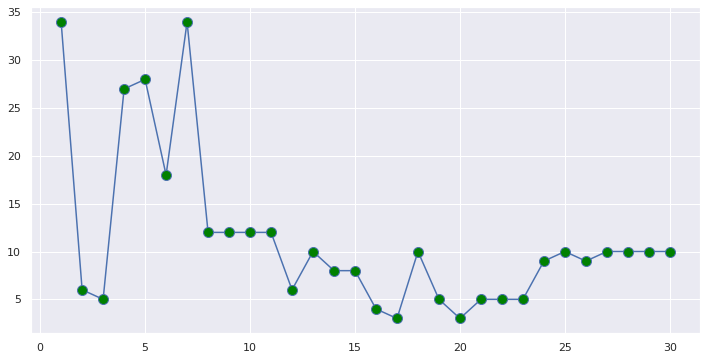

In [121]:
# find the corresponding tuned k with different number of features with standardized train dataset
# first, append k with full features to he best_k list
from sklearn.neighbors import KNeighborsClassifier
best_k_at30 = []
full_feature_score = []
for i in range(1, 100):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn_model, X_train_stand, y_train, cv=5, return_train_score=False)
  mean_score = scores['test_score'].mean()
  full_feature_score.append(mean_score)
best_score_full_index=full_feature_score.index(max(full_feature_score))
best_k.reverse()
best_k.append(best_score_full_index + 1)

plt.figure(figsize=(12, 6)) 
num_of_feature = []
for i in range(1, 31):
  num_of_feature.append(i)
plt.plot(num_of_feature, best_k, marker='o', markerfacecolor='green', markersize=10)

Obviously, standardization helped the model and the accuracy scores being improved significantly. There are many peaks of cross validation accuracy score on the first plot, I would say, the model with full features(30 features) leads to the highest accuracy score. The best K under this model can be seen on the second plot: K = 10.

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [123]:
from sklearn.metrics import accuracy_score
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_stand, y_train)
accuracy = accuracy_score(y_test, knn_10.predict(X_test_stand))
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  95.90643274853801 %


Based on the plots on Part 4, the model has highest cross validation accuracy score when 30 features are all included. Thus, the model I select is the standardized data with full feature, with tuned K = 10. Predict the model on the standardized test dataset and we can get the test set accuracy score of 96%. 

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/